In [ ]:
#lorenz[0,1000] by CNS

In [1]:
function Wfile(A,Times,figure)
    if figure == 1
        XLSX.openxlsx("LorenzF_J.xlsx", mode="w") do xf
        sheet = xf[1]
        XLSX.rename!(sheet, "new_sheet")
        sheet["A1"] = "X"
        sheet["B1"] = "Y"
        sheet["C1"] = "Z"
        str1="A2:C"*string(Times+1)
        sheet[str1] = A
        end
    else
        XLSX.openxlsx("LorenzF_J.xlsx", mode="rw") do xf
        sheet = xf[1]
        str2="A"*string((figure-1)*Times+2)*":C"*string(figure*Times+1)
        sheet[str2] = A 
        end
    end        
end

Wfile (generic function with 1 method)

In [2]:
function accuracy()
    ac=2800;
    return ac;
end

accuracy (generic function with 1 method)

In [3]:
setprecision(accuracy());

In [4]:
function order()
    M=400;
    return M+1;
end

order (generic function with 1 method)

In [5]:
function goon(A)
    A[end,:] = A[end,1];
    return A
end 

goon (generic function with 1 method)

In [6]:
function steps()
    h = BigFloat(1)/BigFloat(100)
    return h;
end

steps (generic function with 1 method)

In [7]:
function JCh(k,i)
     
    k = BigFloat(k);
    i = BigFloat(i);
    s = BigFloat(1);
    if i < k/2
        i = k - i;
    end
    for j in range(k,i+1,step=-1)
        
        j1=BigFloat(j)
        s = s*j1/(j1-i)
        
    end
    
    return s
end

JCh (generic function with 1 method)

In [8]:
function DJCh()
    Cki = Array{BigFloat}(undef,order()-1,order()-1);
    for k in 1:order()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end

DJCh (generic function with 1 method)

In [9]:
function multi()
    S = Array{BigFloat}(undef,1,order());
    S[1] = BigFloat(1)
    
    for i in 1:order()-1
        S[i+1] = S[i]*steps()/BigFloat(i)
    end
    
    return S
end

multi (generic function with 1 method)

In [10]:
"""function Sumxyz(k,x,y,Cki)
    s = (reverse!(x))' * (Cki[k+1,1:k+1].*y)
    #println("=======",k+1,"=====================")
    return s
end
"""

"function Sumxyz(k,x,y,Cki)\n    s = (reverse!(x))' * (Cki[k+1,1:k+1].*y)\n    #println(\"=======\",k+1,\"=====================\")\n    return s\nend\n"

In [11]:
fdot(x,y,z) = @. x*y*z

fdot (generic function with 1 method)

In [12]:
function Sumxyz(k,x,y,Cki)
    return sum(fdot(Cki,reverse!(x),y))
end 

Sumxyz (generic function with 1 method)

In [13]:
function Talor(x,y,z,Cki)
    for k in 1:order()-1
        x[k+1] = c*(-x[k] + y[k])
        y[k+1] = R*x[k] - y[k] - Sumxyz(k-1,x[1:k],z[1:k],Cki[k,1:k])
        z[k+1] =  -b*z[k] + Sumxyz(k-1,x[1:k],y[1:k],Cki[k,1:k]) 
        
        #if mod(k,100)==0
            #println(k,")","求导阶数为：",k+1)
        #end
       
    end
    return [x,y,z]
end

Talor (generic function with 1 method)

In [14]:
function Iteration(x,y,z,Times,Cki,Lorenz)
    
    for st in 1:Times
    
        Tay = Talor(x,y,z,Cki)
        x = Tay[1]
        y = Tay[2]
        z = Tay[3]
        
        x[1] = sum(Dmulti[1:order()].*x[1:order()]);
        y[1] = sum(Dmulti[1:order()].*y[1:order()]);
        z[1] = sum(Dmulti[1:order()].*z[1:order()]);
    
        Lorenz[st,:] = [x[1],y[1],z[1]] 
    end
    
    return Lorenz
    
end

Iteration (generic function with 1 method)

In [15]:
function Lmain(x,y,z,Times,Cki,Maxi,Lorenz)
    
    for i in 1:Maxi
    
        Lorenz = Iteration(x,y,z,Times,Cki,Lorenz)
    
        x[1] = Lorenz[end,1]
        y[1] = Lorenz[end,2]
        z[1] = Lorenz[end,3]
    
        Lorenzf = convert.(Float32,Lorenz)
        Lorenztol[Times*(i-1)+1:Times*i,:] = Lorenzf
        
        println(i,")","LTU=",convert(Float16,Times*i*steps()),": ",Lorenzf[end,:])
        
    end
    return Lorenztol
end

Lmain (generic function with 1 method)

In [16]:
#defining
using XLSX
setprecision(accuracy());

Times = 100;     #attension to use steps
Maxi = 50;             #tatol time = Max * Times(down)

c = BigFloat(10);
R = BigFloat(28) #+ BigFloat(1)/BigFloat(2);
b = BigFloat(8)/BigFloat(3);

x = Array{BigFloat}(undef,order())
y = Array{BigFloat}(undef,order())
z = Array{BigFloat}(undef,order())
x[1] = BigFloat(-15) - BigFloat(8)/BigFloat(10); 
y[1] = BigFloat(-17) - BigFloat(48)/BigFloat(100); 
z[1] = BigFloat(35) + BigFloat(64)/BigFloat(100);

Lorenz = Array{BigFloat}(undef,Times,3);
Lorenzf = Array{Float32}(undef,Times,3);
Lorenztol = Array{Float32}(undef,Times*Maxi,3);
Cki = Array{BigFloat}(undef,order()-1,order()-1);
Dmulti = Array{BigFloat}(undef,1,order());

Cki = DJCh();
Dmulti = multi();

In [17]:
#Main 
@time Lorenztol = Lmain(x,y,z,Times,Cki,Maxi,Lorenz);

1)LTU=1.0: Float32[1.5117365, -0.24759945, 22.903538]
2)LTU=2.0: Float32[-3.5697, -5.569203, 18.360006]
3)LTU=3.0: Float32[-14.20579, -15.045836, 33.798187]
4)LTU=4.0: Float32[-2.7789822, 2.5764997, 28.592028]
5)LTU=5.0: Float32[-0.2628078, -0.5711654, 14.241541]
6)LTU=6.0: Float32[7.8659625, 11.663771, 20.07733]
7)LTU=7.0: Float32[6.084152, 1.7162509, 29.682533]
8)LTU=8.0: Float32[3.232218, 5.1860523, 14.585544]
9)LTU=9.0: Float32[-0.8460409, -1.6522517, 6.81417]
10)LTU=10.0: Float32[11.439321, 10.079237, 32.274387]
11)LTU=11.0: Float32[5.080831, 6.4601517, 20.284092]
12)LTU=12.0: Float32[11.313323, 7.3680043, 34.587467]
13)LTU=13.0: Float32[3.2121873, 4.247956, 18.06635]
14)LTU=14.0: Float32[12.082209, 18.369173, 23.09945]
15)LTU=15.0: Float32[-15.565276, -9.067534, 42.11533]
16)LTU=16.0: Float32[2.73535, 3.3621337, 18.470665]
17)LTU=17.0: Float32[7.7660065, 13.640186, 14.190183]
18)LTU=18.0: Float32[-9.712475, -1.1553512, 36.590557]
19)LTU=19.0: Float32[-0.5082675, -3.0685444, 23.51

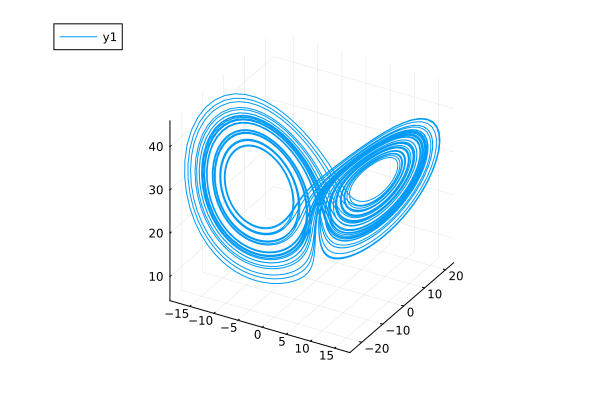

In [18]:
#drawing
using Plots; 
plot(Lorenztol[:,1],Lorenztol[:,2],Lorenztol[:,3])

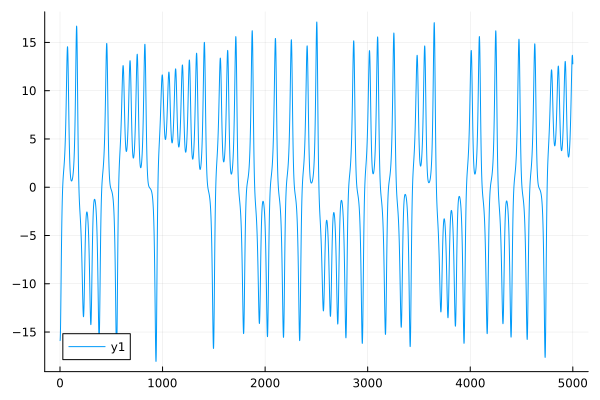

In [19]:
plot(1:Times*Maxi,Lorenztol[:,1])

In [22]:
Times = Times*Maxi
#write
function Wfile(AT,BE,Times)
#change name--------------------------------------------
    XLSX.openxlsx("CNS_lorenz.xlsx", mode="w") do xf
#-------------------------------------------------------
        sheet = xf[1]
        XLSX.rename!(sheet, "new_sheet")
#change location----------------------------------------
        sheet["A1"] = "T"
        sheet["B1"] = "X"
        sheet["A2",dim=1] = AT[1:end]
        sheet["B2",dim=1] = BE[1:end]
#-------------------------------------------------------
    end
end
#-----------------------------------------------------------------------------
using XLSX
#time-----------------------------------------------------
AT=Array{Float64}(undef,Times)
for i in 1:Times
    AT[i] = i*steps()
end
#time-----------------------------------------------------
BE = Lorenztol[:,1]
#--------------------------------------------------------
Wfile(AT,BE,Times);